In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread(os.path.join('collected_images', 'Apple', 'Apple0.jpg'))
img.shape

(1080, 1920, 3)

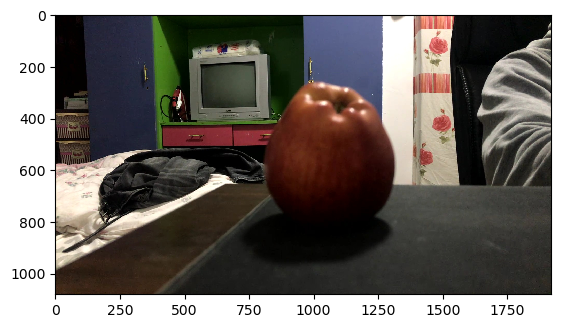

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
data = tf.keras.utils.image_dataset_from_directory('collected_images')

Found 1293 files belonging to 2 classes.


2023-01-09 10:40:46.078811: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aliub20/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/aliub20/catkin_ws/devel/lib:/opt/ros/noetic/lib
2023-01-09 10:40:46.078861: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-09 10:40:46.078884: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aliub20): /proc/driver/nvidia/version does not exist
2023-01-09 10:40:46.079320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations,

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()   #Images and labels (2)

In [7]:
print(batch[0].shape)   #Resized 256x256 "batch = 32"
print(len(batch))
print(batch[1])
batch[1]

(32, 256, 256, 3)
2
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0]


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

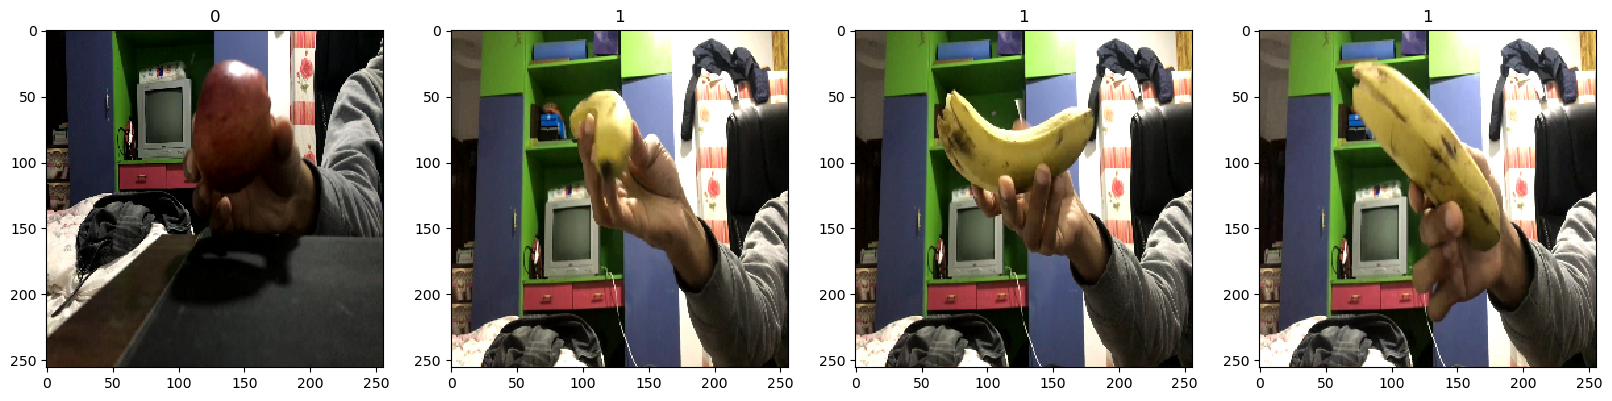

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
#We do that to normalize the input data
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
scaled_iterator = data.as_numpy_iterator()

In [11]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

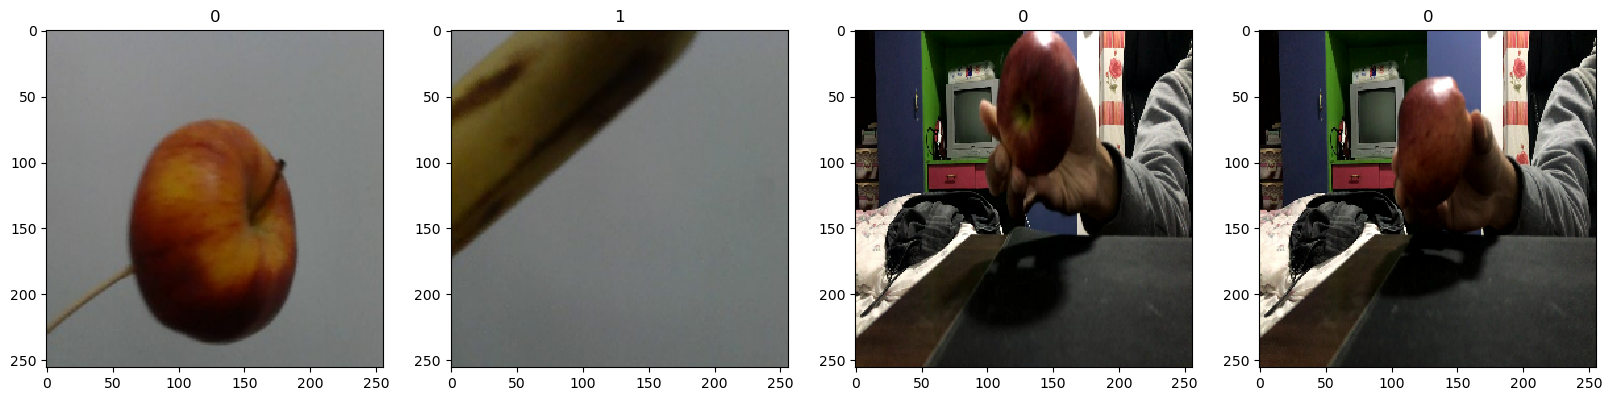

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Splitting data into training and testing

In [13]:
print(len(data))
train_size = int(len(data)*0.5)
val_size = int(len(data)*0.2)+1   #Evaluate data while we train
test_size = int(len(data)*0.3)+1   #Hold that all the way until the end
print(train_size)
print(val_size)
print(test_size)

41
20
9
13


In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [19]:
logdir = 'logs'

In [20]:
tensorboard_calback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=10, validation_data= val, callbacks= [tensorboard_calback])

Epoch 1/10
20/20 [==============================] - 18s 860ms/step - loss: 0.8014 - accuracy: 0.7766 - val_loss: 0.4603 - val_accuracy: 0.8507
Epoch 2/10
20/20 [==============================] - 18s 852ms/step - loss: 0.2644 - accuracy: 0.8562 - val_loss: 0.3197 - val_accuracy: 0.8160
Epoch 3/10
20/20 [==============================] - 18s 851ms/step - loss: 0.2499 - accuracy: 0.8625 - val_loss: 0.3158 - val_accuracy: 0.8090
Epoch 4/10
20/20 [==============================] - 17s 835ms/step - loss: 0.2199 - accuracy: 0.8813 - val_loss: 0.2709 - val_accuracy: 0.8438
Epoch 5/10
20/20 [==============================] - 18s 852ms/step - loss: 0.1904 - accuracy: 0.9094 - val_loss: 0.2332 - val_accuracy: 0.8507
Epoch 6/10
20/20 [==============================] - 17s 829ms/step - loss: 0.1657 - accuracy: 0.9297 - val_loss: 0.2602 - val_accuracy: 0.8785
Epoch 7/10
20/20 [==============================] - 17s 819ms/step - loss: 0.1057 - accuracy: 0.9656 - val_loss: 0.2076 - val_accuracy: 0.8681

Plotting Performance

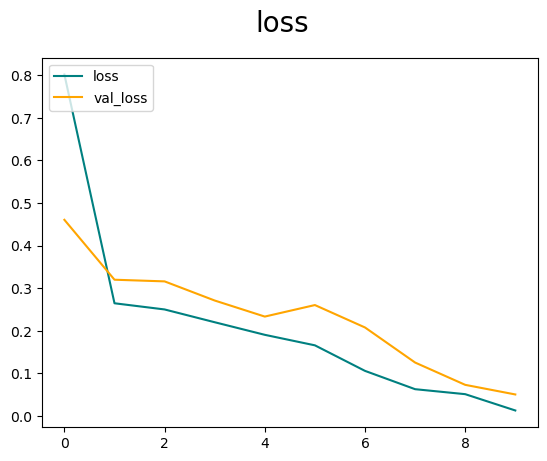

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

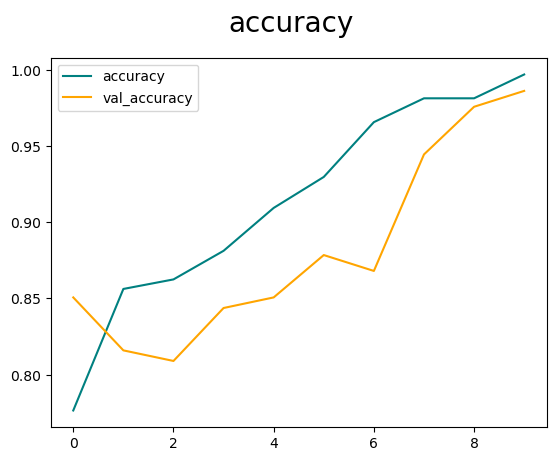

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Evaluate Performance

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 97ms/step


In [27]:
print(f'Precision{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision1.0, Recall:0.9739583134651184, Accuracy:0.9863013625144958


In [ ]:
#Connect to webcam
cap = cv2.VideoCapture(-1)

#establishes a loop to every frame until we close the webcam
while cap.isOpened():
    ret, frame = cap.read()
    #show image
    cv2.imshow('Webcam', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('c'):
        cv2.imwrite("appleshot.jpg", frame)

    elif cv2.waitKey(1) & 0xFF == ord('v'):
        cv2.imwrite("bananashot.jpg", frame)

    #Checks wheter q has ben hit and stops the loop
    elif cv2.waitKey(1) & 0xFF ==ord('q'):
        break
    
#release the webcam
cap.release()
#closes the frame
cv2.destroyAllWindows()

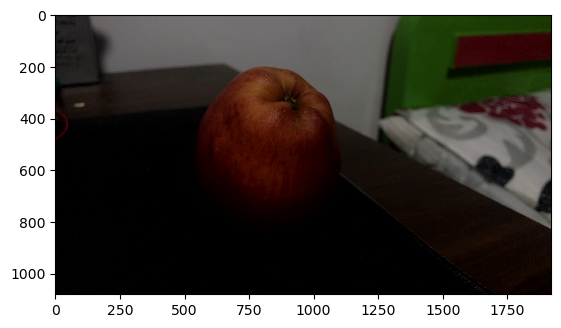

(1080, 1920, 3)

In [28]:
img = cv2.imread('bananashot.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img.shape

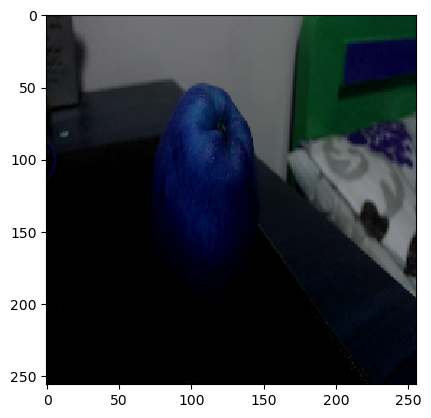

TensorShape([256, 256, 3])

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
resize.shape

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [31]:
yhat

array([[0.41724008]], dtype=float32)

In [32]:
if yhat >0.5:
    print("Predicted class is Banana")
else:
    print("Predicted class is Apple")

Predicted class is Apple


Save the Model

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model.save(os.path.join('models', 'CNN_BA.h5'))

In [35]:
new_model = load_model(os.path.join('models','CNN_BA.h5'))

In [36]:
new_model

In [37]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 72ms/step


In [38]:
if yhatnew >0.5:
    print("Predicted class is Banana")
else:
    print("Predicted class is Apple")

Predicted class is Apple
